In [30]:
# Author: Jorge S. Diaz
# Created: 10 Jun 2017

# Nuclear Power Stations Worldwide

This notebook shows how to use Matplotlib's Basemap to display the location of every nuclear power station around the world. Data of the location information according to the Power Reactor Information System (PRIS), maintained by the International Atomic Energy Agency (IAEA). The data is [available as a Google Fusion Table](https://fusiontables.google.com/DataSource?dsrcid=579353#rows:id=1).

Import necessary modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
sns.set(context='paper', style='darkgrid', rc={'figure.facecolor':'white'}, font_scale=1.2)
from mpl_toolkits.basemap import Basemap
%matplotlib inline

After saving the data as CSV, load into a `pandas` dataframe:

In [2]:
# get data: https://fusiontables.google.com/DataSource?dsrcid=579353#rows:id=1
path_nuclear = 'data\\Nuclear_power_stations_worldwide.csv'
df = pd.read_csv(path_nuclear)

View the first rows of the data file

In [3]:
df.head()

,Country,Name,Lat,Lon,Total number of reactors,Active Reactors,Reactors Under Construction,Shut Down Reactors
0,ARGENTINA,ATUCHA,-34.000000,-59.166672,2,1,1,0
1,ARGENTINA,EMBALSE,-32.233330,-64.433327,1,1,0,0
2,ARMENIA,ARMENIA,40.166672,44.133331,2,1,0,1
3,BELGIUM,BR,51.216671,5.083330,1,0,0,1
4,BELGIUM,DOEL,51.333328,4.250000,4,4,0,0


Each nuclear power station is characterized by its location (country and coordinates), its name, the total number of reactor cores, and a breakdown to active, under-construction, and shut-down reactors.

Let us neglect the reactors under construction and only consider the currently existing reactors, which we will split into *active* (`active`) and *shut-down* (`down`) reactors. Since we are only interested in their coordinates, we perform the splitting only for the `Lat` and `Lon` columns and save each of them as a  `list`:

In [4]:
lat_active = list(df[df['Active Reactors'] > 0]['Lat'])
lon_active = list(df[df['Active Reactors'] > 0]['Lon'])

lat_down = list(df[df['Active Reactors'] == 0]['Lat'])
lon_down = list(df[df['Active Reactors'] == 0]['Lon'])

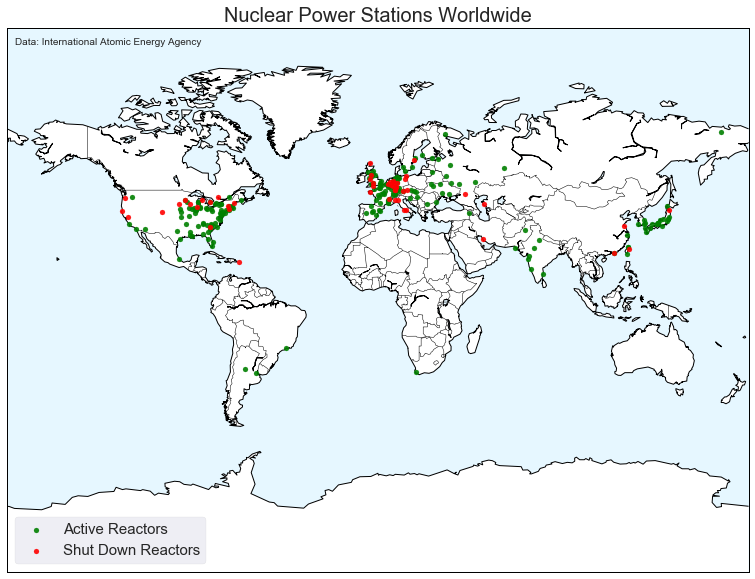

In [5]:
plt.figure(figsize=(14, 10))
m = Basemap(projection = 'mill')
m.drawcoastlines()
m.drawmapboundary(fill_color='#e6f7ff')
m.drawcountries()
m.fillcontinents(color='w', lake_color='#e6f7ff')

x_active, y_active = m(lon_active, lat_active)
m.scatter(x_active, y_active, c='g', alpha=0.9, 
          marker='o', s=25, zorder=10,
          label='Active Reactors')

x_down, y_down = m(lon_down, lat_down)
m.scatter(x_down, y_down, c='r', alpha=0.9, 
          marker='o', s=25, zorder=10,
          label='Shut Down Reactors')

plt.title('Nuclear Power Stations Worldwide', fontsize=20)
plt.legend(loc='lower left', fontsize=15, frameon=True)
plt.annotate('Data: International Atomic Energy Agency', 
             xy=(0.01, 0.97), xycoords='axes fraction', fontsize=10);
#plt.annotate('@jsdiaz_', xy=(0.91, 0.01), xycoords='axes fraction', fontsize=13);
#plt.savefig('Nuclear_power_stations_worldwide.pdf');

## Bonus: Germany zoom 

In [ ]:
plt.figure(figsize=(14, 10))

m = Basemap(projection='mill', resolution='i',
            llcrnrlat=47.069222, llcrnrlon=5.345825,
            urcrnrlat=55.251758, urcrnrlon=16.2)

m.drawmapboundary(fill_color='#e6f7ff')
m.drawcoastlines()
m.drawcountries()

m.fillcontinents (color='w', lake_color='#e6f7ff');

x_active, y_active = m(lon_active, lat_active)
m.scatter(x_active, y_active, c='g', alpha=0.9, 
          marker='o', s=50, zorder=10,
          label='Active Reactors')

x_down, y_down = m(lon_down, lat_down)
m.scatter(x_down, y_down, c='r', alpha=0.9, 
          marker='o', s=50, zorder=10,
          label='Shut Down Reactors')

plt.legend(loc='lower right', fontsize=13, frameon=True);